In [1]:
import os
import pandas as pd

results = [x for x in os.listdir(".") if 
 ("_remco_" in x)
 and (x.endswith("bias.tsv"))
]
df_results = pd.concat(pd.read_table(x) for x in results)
df_results["Target"] = df_results.Model.apply(lambda x : x.split("_")[0])
df_results.sort_values("Target", inplace=True)
df_results.to_csv("remco_bias.tsv", header=True, index=False, sep="\t")
df_results

,ActTrain,InactTrain,ActTest,InactTest,knn1,lr,rf,svm,AA-AI,II-IA,...,Model,descriptor,gamma,sim_metric,sim_threshold,test_size,seed,Replica,Seed,Target
571,348.0,695.0,83.0,178.0,0.782388,0.865845,0.890348,0.889197,0.064819,0.158989,...,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",morgan3,0.75,tanimoto,0.8,0.2,57.0,15,57,O14842
390,358.0,685.0,73.0,188.0,0.749381,0.858642,0.858715,0.872049,0.064658,0.124043,...,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",morgan3,0.75,tanimoto,0.6,0.2,52.0,10,52,O14842
389,348.0,695.0,83.0,178.0,0.742656,0.826181,0.859178,0.859077,0.058313,0.137640,...,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",morgan3,0.75,tanimoto,0.4,0.2,52.0,10,52,O14842
388,352.0,691.0,79.0,182.0,0.768188,0.893796,0.898178,0.900890,0.073165,0.161978,...,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",morgan3,0.75,tanimoto,0.2,0.2,52.0,10,52,O14842
387,340.0,704.0,91.0,169.0,0.807270,0.906756,0.914494,0.908186,0.076703,0.160828,...,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",morgan3,0.50,tanimoto,0.8,0.2,52.0,10,52,O14842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,452.0,339.0,114.0,83.0,0.796713,0.928134,0.916033,0.906679,0.091404,0.130843,...,"Q9H244_remco-ExtraTrees(descriptor=morgan3,gam...",morgan3,-0.25,tanimoto,0.8,0.2,61.0,19,61,Q9H244
700,446.0,344.0,120.0,78.0,0.789103,0.895299,0.914423,0.897970,0.079833,0.163077,...,"Q9H244_remco-ExtraTrees(descriptor=morgan3,gam...",morgan3,0.00,tanimoto,0.2,0.2,61.0,19,61,Q9H244
701,445.0,345.0,121.0,77.0,0.749705,0.919395,0.913384,0.897607,0.076860,0.119740,...,"Q9H244_remco-ExtraTrees(descriptor=morgan3,gam...",morgan3,0.00,tanimoto,0.4,0.2,61.0,19,61,Q9H244
695,458.0,332.0,108.0,90.0,0.785185,0.872016,0.890895,0.875926,0.103889,0.125333,...,"Q9H244_remco-ExtraTrees(descriptor=morgan3,gam...",morgan3,-0.50,tanimoto,0.8,0.2,61.0,19,61,Q9H244


<Axes: xlabel='Target', ylabel='(AA-AI)+(II-IA)'>

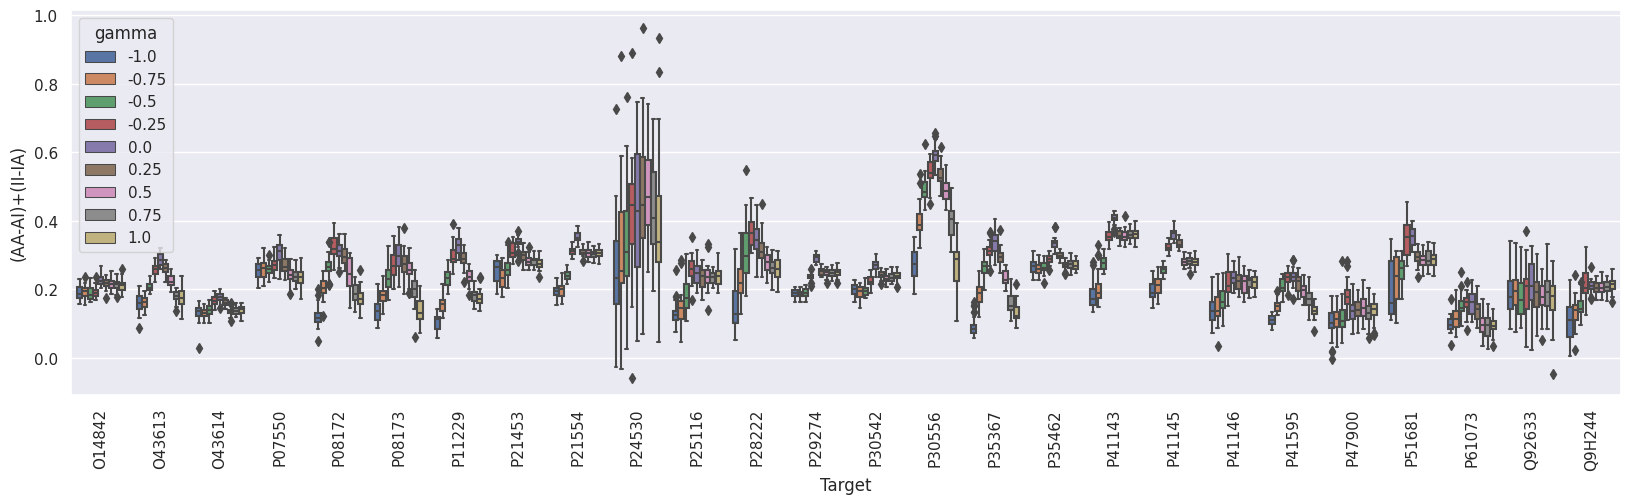

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={"figure.figsize":(20, 5)})
plt.xticks(rotation=90)

thrs = 0.4 # similarity threshold used to determine similar/disimilar molecules (MORGAN, 2048 bit, radius 3)
sns.boxplot(
    data=df_results[df_results.sim_threshold == thrs],
    x="Target",
    y="(AA-AI)+(II-IA)",
    hue="gamma" # parameter that determines the 'adversity' of a split (lower means more difficult, 0.5 is random and > 0.5 should be easier than random).
)

<Axes: xlabel='Target', ylabel='N'>

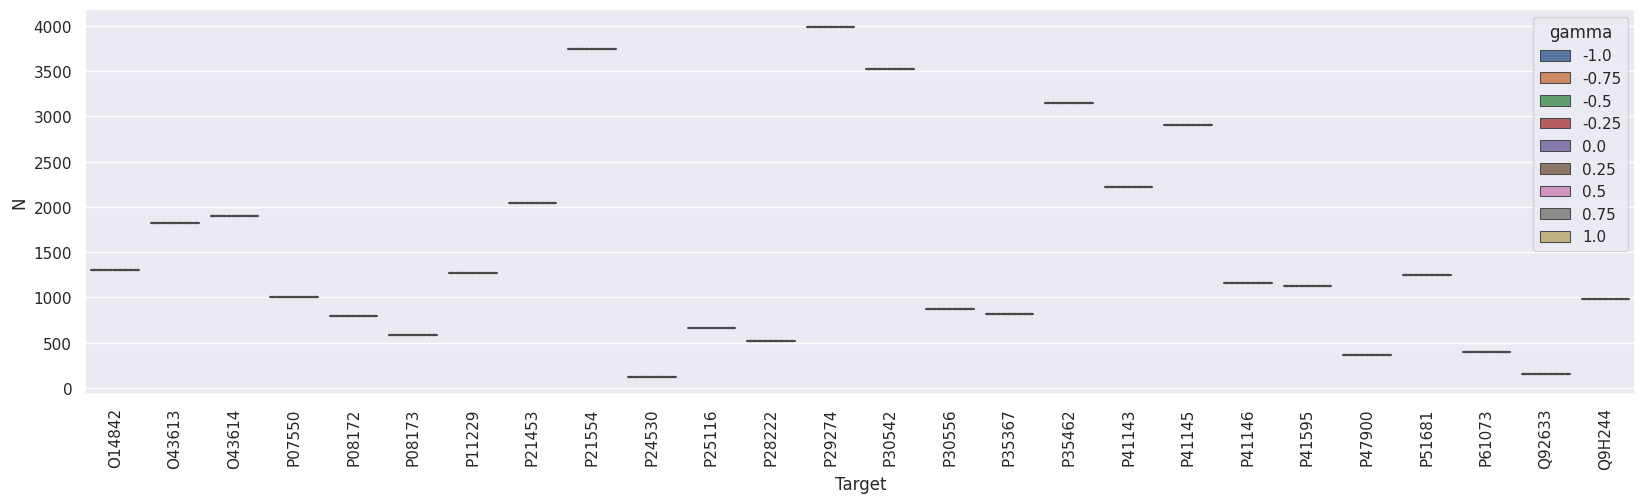

In [3]:
# sets with high variablity are the small sets
df_results["N"] = df_results[["ActTrain", "InactTrain", "ActTest", "InactTest"]].apply(lambda x: x.sum(), axis=1)
plt.xticks(rotation=90)
sns.boxplot(
    data=df_results[df_results.sim_threshold == thrs],
    x="Target",
    y="N",
    hue="gamma"
)

<Axes: xlabel='Target', ylabel='TrainBalance'>

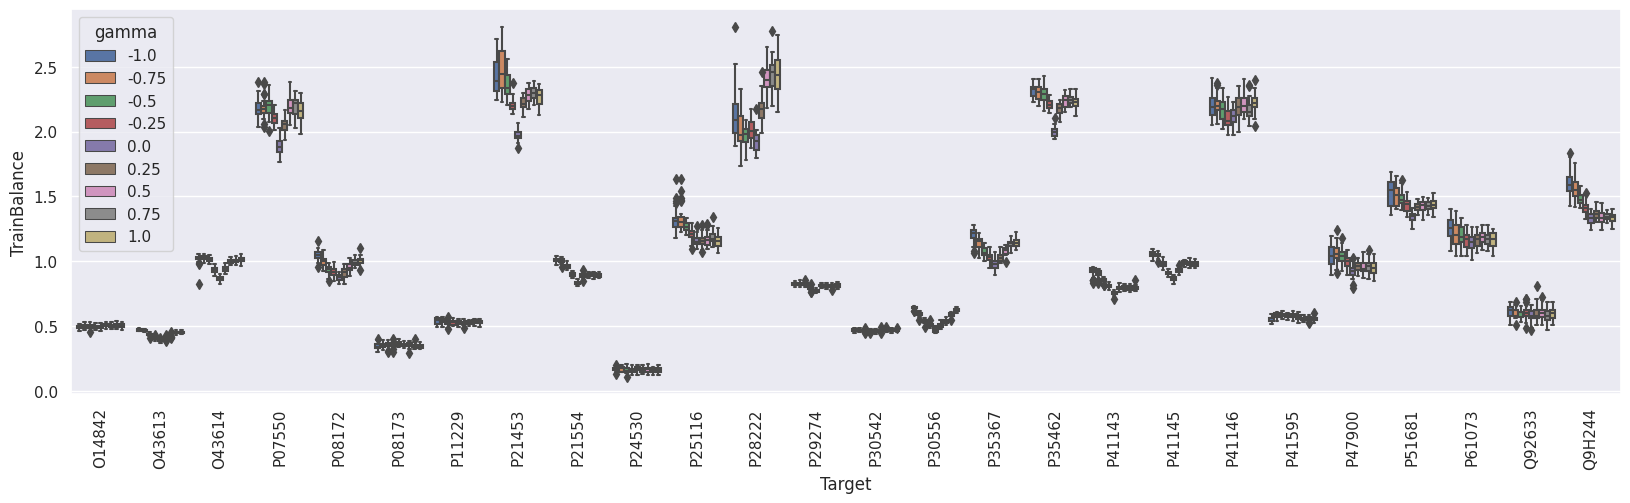

In [4]:
# balance of training set
df_results["TrainBalance"] = df_results[["ActTrain", "InactTrain", "ActTest", "InactTest"]].apply(lambda x: x.ActTrain / x.InactTrain, axis=1)
plt.xticks(rotation=90)
sns.boxplot(
    data=df_results[df_results.sim_threshold == thrs],
    x="Target",
    y="TrainBalance", # as determined from the AVE script
    hue="gamma"
)

<Axes: xlabel='Target', ylabel='TestBalance'>

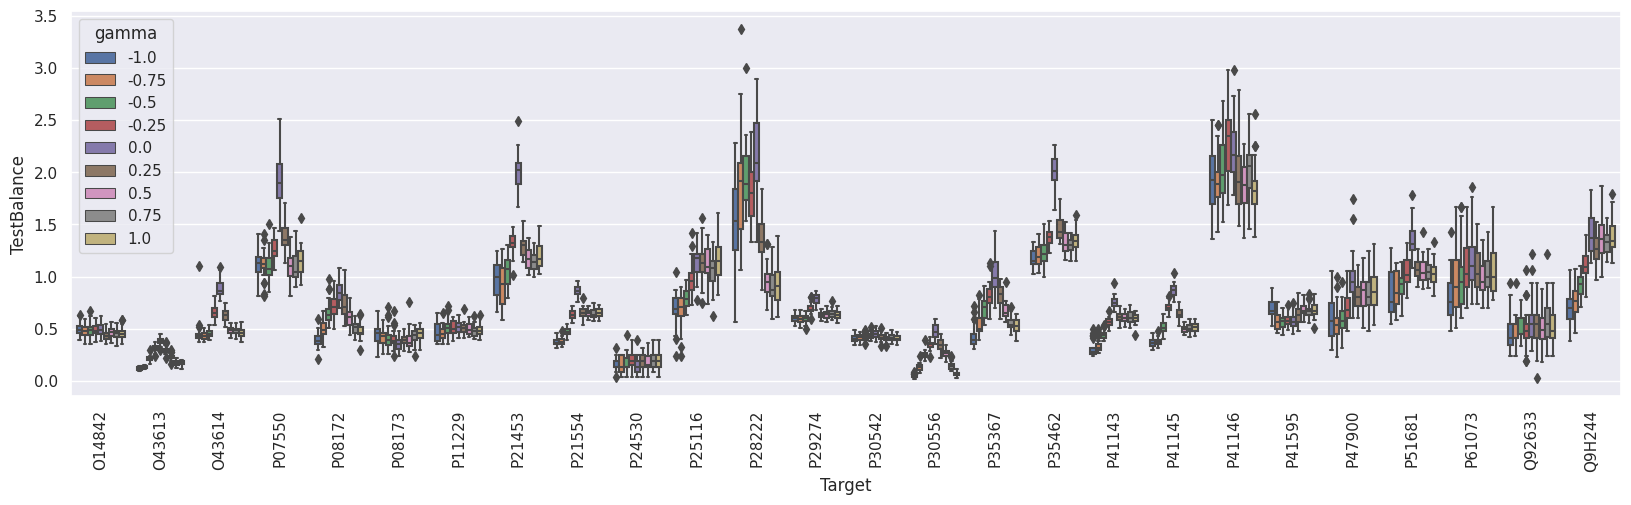

In [5]:
# balance of test set
df_results["TestBalance"] = df_results[["ActTrain", "InactTrain", "ActTest", "InactTest"]].apply(lambda x: x.ActTest / x.InactTest, axis=1)
plt.xticks(rotation=90)
sns.boxplot(
    data=df_results[df_results.sim_threshold == thrs],
    x="Target",
    y="TestBalance", # as determined from the AVE script
    hue="gamma"
)

<Axes: xlabel='Target', ylabel='rf'>

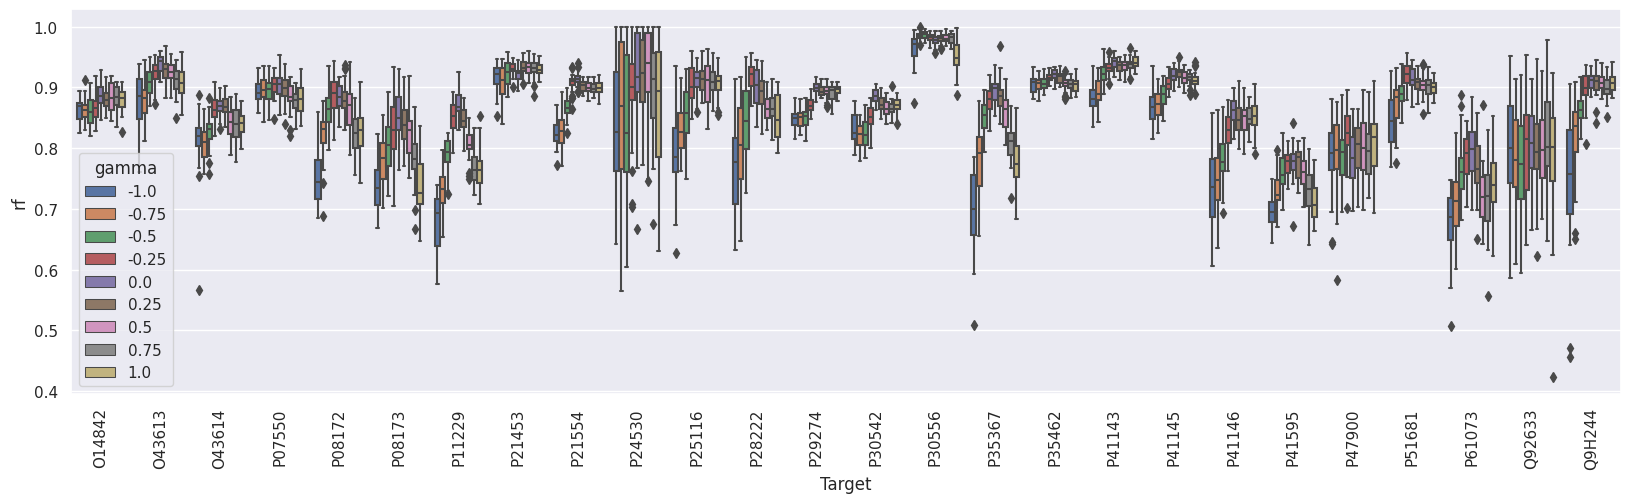

In [6]:
# model performance
plt.xticks(rotation=90)
sns.boxplot(
    data=df_results[df_results.sim_threshold == thrs],
    x="Target",
    y="rf", # as determined from the AVE script
    hue="gamma"
)

In [7]:
# other metrics for my extra trees model
results = [x for x in os.listdir(".") if 
 ("_remco_" in x)
 and (x.endswith("results.tsv"))
]
df_results = pd.concat(pd.read_table(x) for x in results)
df_results["Target"] = df_results.Model.apply(lambda x : x.split("_")[0])
df_results.sort_values("Target", inplace=True)
df_results.to_csv("remco_performance.tsv", header=True, index=False, sep="\t")
df_results

,Metric,Model,TestSet,Value,descriptor,gamma,sim_metric,sim_threshold,test_size,seed,Replica,Seed,Target
4533,recall_score,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",IND,0.648936,morgan3,0.0,tanimoto,0.4,0.2,45.0,3,45,O14842
28185,recall_score,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",IND,0.670886,morgan3,0.5,tanimoto,0.6,0.2,63.0,21,63,O14842
28186,accuracy_score,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",IND,0.788462,morgan3,0.5,tanimoto,0.6,0.2,63.0,21,63,O14842
28187,calibration_error,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",IND,0.211538,morgan3,0.5,tanimoto,0.6,0.2,63.0,21,63,O14842
28188,f1_score,"O14842_remco-ExtraTrees(descriptor=morgan3,gam...",CV1.0,0.701493,morgan3,0.5,tanimoto,0.8,0.2,63.0,21,63,O14842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25918,accuracy_score,"Q9H244_remco-ExtraTrees(descriptor=morgan3,gam...",IND,0.752525,morgan3,1.0,tanimoto,0.8,0.2,61.0,19,61,Q9H244
25917,recall_score,"Q9H244_remco-ExtraTrees(descriptor=morgan3,gam...",IND,0.628571,morgan3,1.0,tanimoto,0.8,0.2,61.0,19,61,Q9H244
25916,precision_score,"Q9H244_remco-ExtraTrees(descriptor=morgan3,gam...",IND,0.656716,morgan3,1.0,tanimoto,0.8,0.2,61.0,19,61,Q9H244
25914,f1_score,"Q9H244_remco-ExtraTrees(descriptor=morgan3,gam...",IND,0.642336,morgan3,1.0,tanimoto,0.8,0.2,61.0,19,61,Q9H244


<Axes: xlabel='Target', ylabel='Value'>

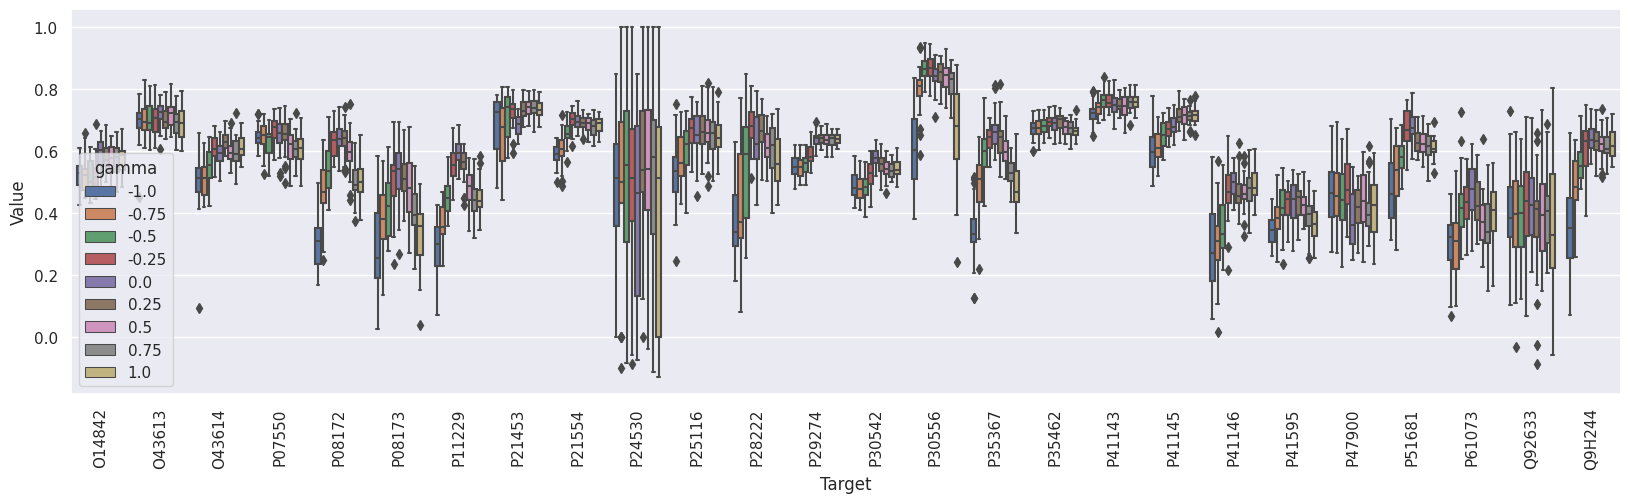

In [8]:
# plot the MCC values
plt.xticks(rotation=90)
sns.boxplot(
    data=df_results[(df_results.sim_threshold == thrs) & (df_results.TestSet == "IND") & (df_results.Metric == "matthews_corrcoef")],
    x="Target",
    y="Value", # as determined from the AVE script
    hue="gamma"
)